<a href="https://colab.research.google.com/github/Katerine-Chanci-Echeverri/Project-2---Spaceship-Titanic/blob/main/Spaceship_Titanic_Ultimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importar librerías**

In [ ]:
#Necesitaremos la librería dython 
#!pip install dython

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from dython import nominal
from dython.nominal import associations
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn import set_config
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics   
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
set_config(display='diagram')

## **Cargar los datos**

In [ ]:
#Conjunto de entrenamiento
drive.mount("/content/drive")
train = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo 🐉/Proyecto 2/train.csv"
data = pd.read_csv(train)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
data.shape

(8678, 12)

In [ ]:
#Conjunto de prueba
test = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo 🐉/Proyecto 2/test.csv"
data_t = pd.read_csv(test)
data_t.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## **Manipulación de datos**

In [ ]:
#Elimina las columnas "PassengerId" y "Name"
#Data 
data = data.drop(columns = ["PassengerId", "Name"])

#Data_test 
data_test = data_t.drop(columns = ["PassengerId","Name"])

In [ ]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### **Datos duplicados**

In [ ]:
#Data
data.duplicated().sum()

15

In [ ]:
#Elimina los datos duplicados
data = data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
#Data_test
data_test.duplicated().sum()

11

In [ ]:
#Elimina los datos duplicados
data_test = data_test.drop_duplicates()
data_test.duplicated().sum()

0

### **Tipo de datos**

In [ ]:
#Data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8678 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8477 non-null   object 
 1   CryoSleep     8461 non-null   object 
 2   Cabin         8485 non-null   object 
 3   Destination   8496 non-null   object 
 4   Age           8499 non-null   float64
 5   VIP           8475 non-null   object 
 6   RoomService   8497 non-null   float64
 7   FoodCourt     8495 non-null   float64
 8   ShoppingMall  8470 non-null   float64
 9   Spa           8495 non-null   float64
 10  VRDeck        8490 non-null   float64
 11  Transported   8678 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 822.0+ KB


In [ ]:
#Data_test
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4266 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4179 non-null   object 
 1   CryoSleep     4173 non-null   object 
 2   Cabin         4169 non-null   object 
 3   Destination   4174 non-null   object 
 4   Age           4175 non-null   float64
 5   VIP           4173 non-null   object 
 6   RoomService   4184 non-null   float64
 7   FoodCourt     4160 non-null   float64
 8   ShoppingMall  4168 non-null   float64
 9   Spa           4165 non-null   float64
 10  VRDeck        4186 non-null   float64
dtypes: float64(6), object(5)
memory usage: 399.9+ KB


### **Datos nulos**

Se reemplazará los datos nulos de las columnas "RoomService", "FoodCourt", "ShoppingMall", "Spa" y "VRDeck" por el valor 0. Mientras que los datos en la columna "Age" se reemplazará por la media, y los datos nulos en la columna "HomePlanet", "CryoSleep" y "Destination" por el valor más frecuente. Finalmente, los datos faltantes en la columna "Cabin" se reemplazarán por la etiqueta "No provided".

In [ ]:
#Data
data.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           193
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [ ]:
#Data_test 
data_test.isna().sum()

HomePlanet       87
CryoSleep        93
Cabin            97
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [ ]:
def fill_values(df):
    df['ShoppingMall'] = SimpleImputer(strategy='constant',fill_value=0).fit_transform(df[['ShoppingMall']])
    df['RoomService'] = SimpleImputer(strategy='constant',fill_value=0).fit_transform(df[['RoomService']])
    df['FoodCourt'] = SimpleImputer(strategy='constant',fill_value=0).fit_transform(df[['FoodCourt']])
    df['Spa'] = SimpleImputer(strategy='constant',fill_value=0).fit_transform(df[['Spa']])
    df['VRDeck'] = SimpleImputer(strategy='constant',fill_value=0).fit_transform(df[['VRDeck']])
    df['Age'] = SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df[['Age']])
    df['HomePlanet'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['HomePlanet']])
    df['CryoSleep'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['CryoSleep']])
    df['Cabin'] = SimpleImputer(strategy='constant', fill_value="No provided").fit_transform(df[['Cabin']])
    df['Destination'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Destination']])
    df['VIP'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['VIP']])

fill_values(data)
fill_values(data_test)

In [ ]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
#Verifica que no haya datos nulos 
#Data, Data_test
data.isna().sum(), data_test.isna().sum()

(HomePlanet      0
 CryoSleep       0
 Cabin           0
 Destination     0
 Age             0
 VIP             0
 RoomService     0
 FoodCourt       0
 ShoppingMall    0
 Spa             0
 VRDeck          0
 Transported     0
 dtype: int64, HomePlanet      0
 CryoSleep       0
 Cabin           0
 Destination     0
 Age             0
 VIP             0
 RoomService     0
 FoodCourt       0
 ShoppingMall    0
 Spa             0
 VRDeck          0
 dtype: int64)

In [ ]:
#Cambia el tipo de dato de la columna "Age" de flotante a entero 
#Data
data["Age"] = data["Age"].astype(int)

#Data_test
data_test["Age"] = data_test["Age"].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8678 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8678 non-null   object 
 1   CryoSleep     8678 non-null   object 
 2   Cabin         8678 non-null   object 
 3   Destination   8678 non-null   object 
 4   Age           8678 non-null   int64  
 5   VIP           8678 non-null   object 
 6   RoomService   8678 non-null   float64
 7   FoodCourt     8678 non-null   float64
 8   ShoppingMall  8678 non-null   float64
 9   Spa           8678 non-null   float64
 10  VRDeck        8678 non-null   float64
 11  Transported   8678 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(5)
memory usage: 822.0+ KB


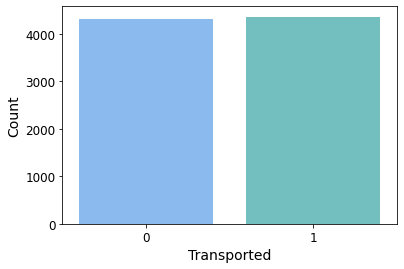

In [ ]:
#Codifica la columna "Transported" en False = 0 y True = 1 y nos muestra la proporción en 
#comparación a la cantidad de datos que tenemos

enc = LabelEncoder()
data['Transported'] = enc.fit_transform(data['Transported'])
t = sns.countplot(data=data,x=data.Transported, palette = ["#7abbff", "#66cccc"])
t.tick_params(labelsize=12)
t.set_xlabel("Transported", fontsize = 14)
t.set_ylabel("Count", fontsize = 14);

## **Feature Engineering**

In [ ]:
#Se cream tres columnas una: la primera regresenta los gastos totales, es la 
#suma de las columnas RoomService, FoodCourt, ShoppingMall, Spa y VRDeck. 
#La segunda representa los gastos básicos ("RoomService" y "FoodCourt")
#La tercera representa los gastos lujosos ("ShoppingMall", "Spa" y "VRDeck")

#Data
data['total_exp'] = data['ShoppingMall']+data['Spa']+data['VRDeck']+data['FoodCourt']+data['RoomService']
data['B_needs'] = data['RoomService']+data['FoodCourt']
data['L_needs'] = data['ShoppingMall']+data['Spa']+data['VRDeck']
data = data.drop(columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", 
                            "VRDeck"])

#Data_test
data_test['total_exp'] = data_test['ShoppingMall']+data_test['Spa']+data_test['VRDeck']+data_test['FoodCourt']+data_test['RoomService']
data_test['B_needs'] = data_test['RoomService']+data_test['FoodCourt']
data_test['L_needs'] = data_test['ShoppingMall']+data_test['Spa']+data_test['VRDeck']

<ipython-input-107-adea106e21ef>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  b = sns.stripplot(data=data,x='Transported',y='B_needs', palette = ["#7abbff", "#66cccc"])


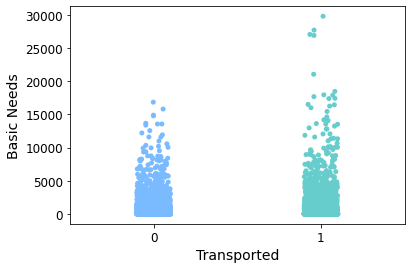

In [ ]:
b = sns.stripplot(data=data,x='Transported',y='B_needs', palette = ["#7abbff", "#66cccc"])
b.tick_params(labelsize=12)
b.set_xlabel("Transported", fontsize = 14)
b.set_ylabel("Basic Needs", fontsize = 14);

<ipython-input-108-d145b2e9bf68>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  l = sns.stripplot(data=data,x='Transported',y='L_needs', palette = ["#7abbff", "#66cccc"])


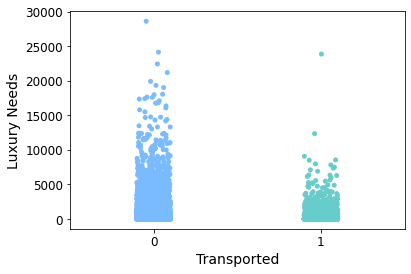

In [ ]:
l = sns.stripplot(data=data,x='Transported',y='L_needs', palette = ["#7abbff", "#66cccc"])
l.tick_params(labelsize=12)
l.set_xlabel("Transported", fontsize = 14)
l.set_ylabel("Luxury Needs", fontsize = 14);

In [ ]:
#Creamos tres nuevas columnas descoponiendo las entras de la columna "Cabin"
#La primera columna da cuenta de la cubierta de la cabina (deck)
#La segunda columna, del número de la cabina
#La tercera columna, del lado de la cabina (Port o Starboard)

#Data
data[['Cabin_deck','Cabin_num','Cabin_side']] = data['Cabin'].str.split("/",expand=True)
data.drop(columns = "Cabin", inplace = True)

#Data_test
data_test[['Cabin_deck','Cabin_num','Cabin_side']] = data_test['Cabin'].str.split("/",expand=True)
data_test.drop(columns = "Cabin", inplace = True)

data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,total_exp,B_needs,L_needs,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39,False,0,0.0,0.0,0.0,B,0,P
1,Earth,False,TRAPPIST-1e,24,False,1,736.0,118.0,618.0,F,0,S
2,Europa,False,TRAPPIST-1e,58,True,0,10383.0,3619.0,6764.0,A,0,S
3,Europa,False,TRAPPIST-1e,33,False,0,5176.0,1283.0,3893.0,A,0,S
4,Earth,False,TRAPPIST-1e,16,False,1,1091.0,373.0,718.0,F,1,S


## **Visualizando datos categóricos en relación con la columna objetivo**

In [ ]:
#HomePlanet
home_planet = data.groupby(["HomePlanet", "Transported"]).size().reset_index().pivot(columns='HomePlanet', index='Transported', values=0)
home_planet

HomePlanet,Earth,Europa,Mars
Transported,,,
0,2749,727,839
1,2050,1398,915


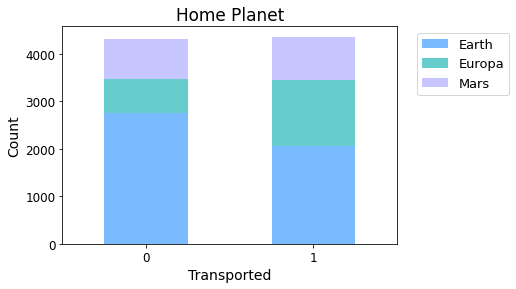

In [ ]:
home_planet.plot(kind='bar', stacked=True, color = ["#7abbff", "#66cccc", "#c7c6ff"])
plt.title("Home Planet", fontsize = 17)
plt.legend(bbox_to_anchor = (1.04, 1), fontsize = 13)
plt.xticks(rotation = 360, size = 12)
plt.yticks(size = 12)
plt.xlabel("Transported", fontsize = 14)
plt.ylabel("Count", fontsize = 14);

In [ ]:
#CryoSleep
cryosleep = data.groupby(["CryoSleep", "Transported"]).size().reset_index().pivot(columns='CryoSleep', index='Transported', values=0)
cryosleep

CryoSleep,False,True
Transported,,
0,3761,554
1,1892,2471


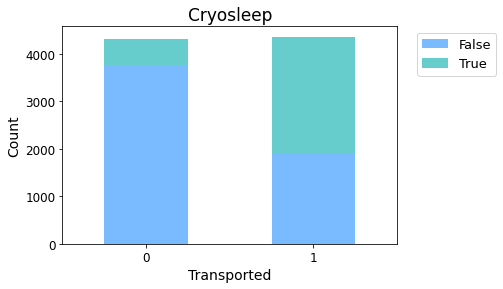

In [ ]:
cryosleep.plot(kind='bar', stacked=True, color = ["#7abbff", "#66cccc", "#c7c6ff"])
plt.title("Cryosleep", fontsize = 17)
plt.legend(bbox_to_anchor = (1.04, 1), fontsize = 13)
plt.xticks(rotation = 360, size = 12)
plt.yticks(size = 12)
plt.xlabel("Transported", fontsize = 14)
plt.ylabel("Count", fontsize = 14);

In [ ]:
#Destination
destination = data.groupby(["Destination", "Transported"]).size().reset_index().pivot(columns='Destination', index='Transported', values=0)
destination

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
0,702,395,3218
1,1092,401,2870


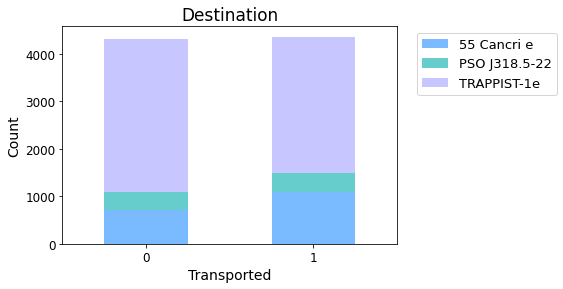

In [ ]:
destination.plot(kind='bar', stacked=True, color = ["#7abbff", "#66cccc", "#c7c6ff"])
plt.title("Destination", fontsize = 17)
plt.legend(bbox_to_anchor = (1.04, 1), fontsize = 13)
plt.xticks(rotation = 360, size = 12)
plt.yticks(size = 12)
plt.xlabel("Transported", fontsize = 14)
plt.ylabel("Count", fontsize = 14);

In [ ]:
#VIP
vip = data.groupby(["VIP", "Transported"]).size().reset_index().pivot(columns='VIP', index='Transported', values=0)
vip

VIP,False,True
Transported,,
0,4192,123
1,4287,76


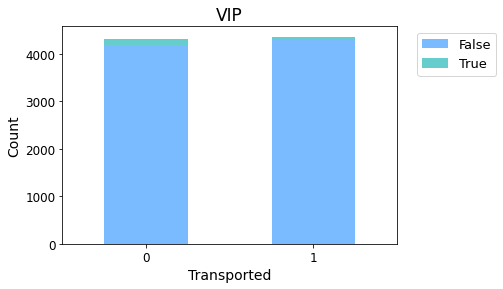

In [ ]:
vip.plot(kind='bar', stacked=True, color = ["#7abbff", "#66cccc", "#c7c6ff"])
plt.title("VIP", fontsize = 17)
plt.legend(bbox_to_anchor = (1.04, 1), fontsize = 13)
plt.xticks(rotation = 360, size = 12)
plt.yticks(size = 12)
plt.xlabel("Transported", fontsize = 14)
plt.ylabel("Count", fontsize = 14);

In [ ]:
#Cabin Side
side = data.groupby(["Cabin_side", "Transported"]).size().reset_index().pivot(columns='Cabin_side', index='Transported', values=0)
side

Cabin_side,P,S
Transported,,
0,2308,1908
1,1893,2376


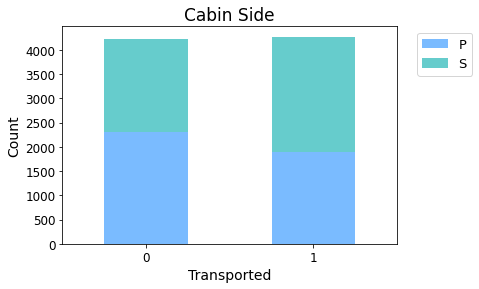

In [ ]:
side.plot(kind='bar', stacked=True, color = ["#7abbff", "#66cccc"])
plt.title("Cabin Side", fontsize = 17)
plt.legend(bbox_to_anchor = (1.04, 1), fontsize = 13)
plt.xticks(rotation = 360, size = 12)
plt.yticks(size = 12)
plt.xlabel("Transported", fontsize = 14)
plt.ylabel("Count", fontsize = 14);

## **Visualización de datos numéricos**

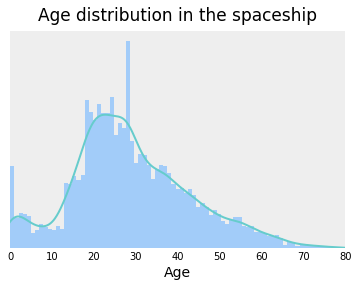

In [ ]:
#Age
age = data["Age"]

plt.style.use("bmh")
fig, ax = plt.subplots(figsize = (6,4))
age.plot(kind = "hist", density = True, alpha = 0.65, bins = 80, color = "#7abbff")
age.plot(kind = "kde", color = "#66cccc")
ax.set_title("Age distribution in the spaceship", fontsize = 17, pad = 10)
ax.set_xlabel("Age", fontsize = 14)
ax.set_ylabel("", fontsize = 14)
ax.set_xlim(0, 80)
ax.set_yticks([])
ax.grid(False)
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

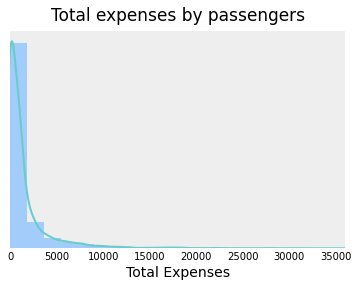

In [ ]:
#Total Expenses
t_exp = data["total_exp"]

plt.style.use("bmh")
fig, ax = plt.subplots(figsize = (6,4))
t_exp.plot(kind = "hist", density = True, alpha = 0.65, bins = 20, color = "#7abbff")
t_exp.plot(kind = "kde", color = "#66cccc")
ax.set_title("Total expenses by passengers", fontsize = 17, pad = 10)
ax.set_xlabel("Total Expenses", fontsize = 14)
ax.set_ylabel("", fontsize = 14)
ax.set_xlim(0, 36000)
ax.set_yticks([])
ax.grid(False)
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

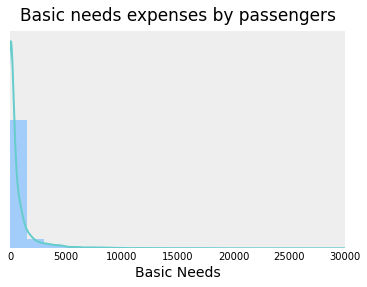

In [ ]:
#Basic Needs
b_needs = data["B_needs"]

plt.style.use("bmh")
fig, ax = plt.subplots(figsize = (6,4))
b_needs.plot(kind = "hist", density = True, alpha = 0.65, bins = 20, color = "#7abbff")
b_needs.plot(kind = "kde", color = "#66cccc")
ax.set_title("Basic needs expenses by passengers", fontsize = 17, pad = 10)
ax.set_xlabel("Basic Needs", fontsize = 14)
ax.set_ylabel("", fontsize = 14)
ax.set_xlim(0, 30000)
ax.set_yticks([])
ax.grid(False)
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

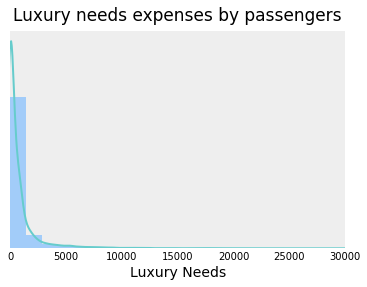

In [ ]:
#Luxury Needs
l_needs = data["L_needs"]

plt.style.use("bmh")
fig, ax = plt.subplots(figsize = (6,4))
l_needs.plot(kind = "hist", density = True, alpha = 0.65, bins = 20, color = "#7abbff")
l_needs.plot(kind = "kde", color = "#66cccc")
ax.set_title("Luxury needs expenses by passengers", fontsize = 17, pad = 10)
ax.set_xlabel("Luxury Needs", fontsize = 14)
ax.set_ylabel("", fontsize = 14)
ax.set_xlim(0, 30000)
ax.set_yticks([])
ax.grid(False)
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

## **Matriz de correlación**

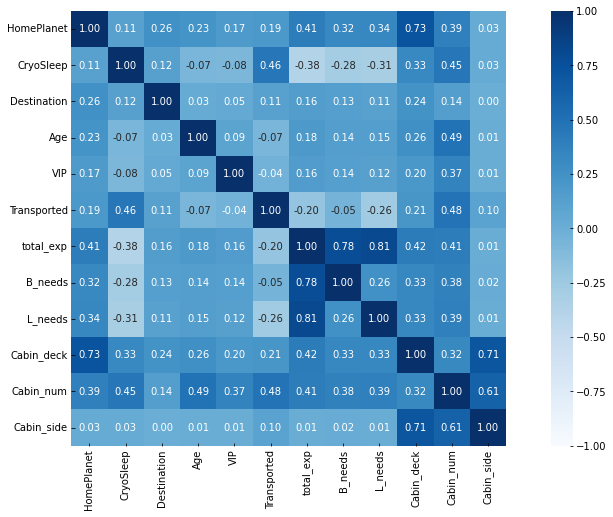

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

r = associations(data, ax = ax, cmap = "Blues")

## **Preprocesamiento de datos**

In [ ]:
#Define la matriz de características y el vector objetivo 
#X = data.drop(columns = "Transported")
#y = data["Transported"]

In [ ]:
#Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train = data.drop(columns = "Transported")
X_test = data_test

y_train = data["Transported"]

In [ ]:
#Escala los datos numéricos y aplica OHE a los datos categóricos
#Scaler
scaler = StandardScaler()

#OHE
ohe = OneHotEncoder(handle_unknown = "ignore", sparse = False)

#Instancien los selectores de acuerdo a los tipos de columnas 
num_selector = make_column_selector(dtype_include = "number")
cat_selector = make_column_selector(dtype_include = "object")

#Tuplas para el preprocesamiento 
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

#Hace ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, 
                                          remainder = "passthrough")

col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f161038d550>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1610264dc0>)])

In [ ]:
#Transforma los datos
X_train_processed = col_transformer.transform(X_train)
X_test_processed  = col_transformer.transform(X_test)

In [ ]:
#Visualiza las transformaciones en forma de DataFrame
column_names = col_transformer.get_feature_names_out(X_train.columns)
X_train = pd.DataFrame(X_train_processed, columns = column_names)
X_test = pd.DataFrame(X_test_processed, columns = column_names)
X_train.head()

,standardscaler__Age,standardscaler__total_exp,standardscaler__B_needs,standardscaler__L_needs,onehotencoder__HomePlanet_Earth,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__CryoSleep_False,onehotencoder__CryoSleep_True,onehotencoder__Destination_55 Cancri e,...,onehotencoder__Cabin_num_994,onehotencoder__Cabin_num_995,onehotencoder__Cabin_num_996,onehotencoder__Cabin_num_997,onehotencoder__Cabin_num_998,onehotencoder__Cabin_num_999,onehotencoder__Cabin_num_None,onehotencoder__Cabin_side_P,onehotencoder__Cabin_side_S,onehotencoder__Cabin_side_None
0,0.709368,-0.514627,-0.389530,-0.425879,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.337126,-0.252207,-0.320885,-0.085730,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.034926,3.187419,1.715774,3.297050,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.290770,1.330869,0.356838,1.716842,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.895255,-0.125632,-0.172542,-0.030689,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train.shape

(8678, 1844)

## **Reducción de dimensionalidad (PCA)**

In [ ]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(X_train)

PCA()

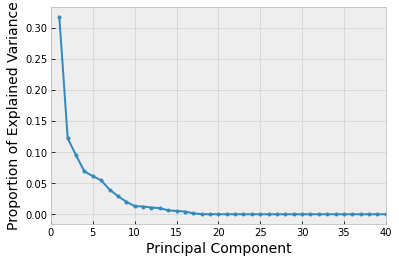

In [ ]:
# Plot the explained variance ratios of the first 30 principal components
plt.plot(range(1, 1845), pca.explained_variance_ratio_, marker = '.')
#plt.xticks(ticks = range(1, 13), fontsize = 12)
plt.xlim(0, 40)
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('Proportion of Explained Variance', fontsize = 14);

Según el gráfico de arriba, ¿cuántos componentes principales deberíamos mantener? En el “codo” o el punto de inflexión en el gráfico anterior se pueden ver alrededor de 15 componentes principales. Aquí es donde no conseguimos muchas ventajas más allá de aumentar el número de componentes, por lo que representa un buen balance.

In [ ]:
# PCA with 15 components
pca15 = PCA(n_components = 15)

## **Modelos de Machine Learning**

### **1. Random Forest**

In [ ]:
#Instancia el modelo 
randomf = RandomForestClassifier()

# Create a modeling pipeline
randomf_pipe = make_pipeline(pca15, randomf)
randomf_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=15)),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
#Evalua el modelo
y_test = randomf_pipe.predict(X_test)
print('Training accuracy:', randomf_pipe.score(X_train, y_train))
print('Testing accuracy:', randomf_pipe.score(X_test, y_test))

Training accuracy: 0.9993085964507951
Testing accuracy: 1.0


In [ ]:
preds = randomf_pipe.predict(X_test)
len(preds)

4266

In [ ]:
data_t.shape

(4277, 13)

In [ ]:
to_submit = pd.DataFrame({"PassengerId": data_t["PassengerId"], "Transported": preds})
to_submit.head()

ValueError: ignored

In [ ]:
'''
#Calcula el valor de max_depth óptimo 

max_depth_range = list(range(2, 20))
# Lista para almacenar la puntuación para cada valor de max_depth:
accuracy = []
for depth in max_depth_range:
    randomf = RandomForestClassifier(max_depth = depth, 
                             random_state = 42)
    randomf_pipe = make_pipeline(pca15, randomf)
    randomf_pipe.fit(X_train, y_train)
    y_test = randomf_pipe.predict(X_test)
    score = randomf_pipe.score(X_test, y_test)
    accuracy.append(score)
'''

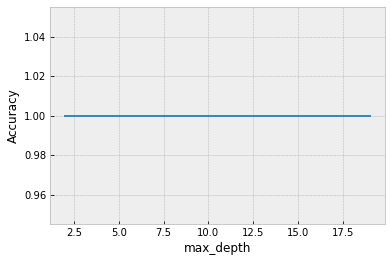

In [ ]:
'''
#Qué valor de max_depth lleva a una accuracy más alta
plt.plot(max_depth_range, accuracy)
plt.xlabel('max_depth')
plt.ylabel('Accuracy');
'''

Elegimos un max_depth = 12

In [ ]:
'''
#max_depth = 12
#Instancia el modelo 
randomf12 = RandomForestClassifier(max_depth = 12)

# Create a modeling pipeline
randomf_pipe12 = make_pipeline(pca15, randomf12)
randomf_pipe12.fit(X_train, y_train)
'''

In [ ]:
'''
#Evalua el modelo
y_test = randomf_pipe12.predict(X_test)
print('Training accuracy:', randomf_pipe12.score(X_train, y_train))
print('Testing accuracy:', randomf_pipe12.score(X_test, y_test))
'''

In [ ]:

#Guarda las predicicones
randomf_preds = randomf_pipe.predict(X_train)

report_randomf = classification_report(y_train, randomf_preds)
print(report_randomf)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4315
           1       1.00      0.95      0.97      4363

    accuracy                           0.97      8678
   macro avg       0.98      0.97      0.97      8678
weighted avg       0.98      0.97      0.97      8678



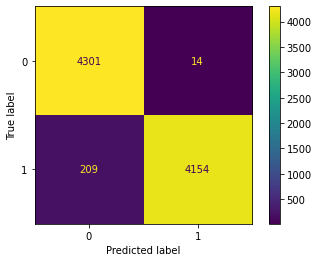

In [ ]:
sns.reset_orig() 
cm_randomf = confusion_matrix(y_train, randomf_preds, labels = randomf_pipe.classes_)
disp_randomf = ConfusionMatrixDisplay(confusion_matrix = cm_randomf,
                                   display_labels = randomf_pipe.classes_)

disp_randomf.plot();


### **2. KNN**

In [ ]:
#Instancia el modelo 
knn = KNeighborsClassifier()

# Create a modeling pipeline
knn_pipe = make_pipeline(pca15, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=15)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
#Evalua el modelo
y_test = knn_pipe.predict(X_test)
print('Training accuracy:', knn_pipe.score(X_train, y_train))
print('Testing accuracy:', knn_pipe.score(X_test, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Training accuracy: 0.8194284397326573
Testing accuracy: 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

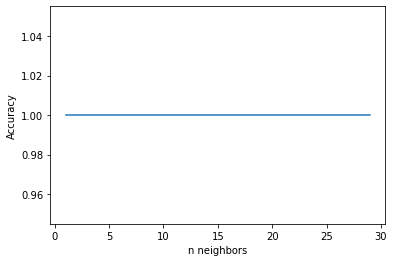

In [ ]:
'''
#Encuentra el valor de n_neighbors óptimo para nuestro conjunto de datos
n_neighbors_range = list(range(1, 30))
accuracy = []
for k in n_neighbors_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn_pipe = make_pipeline(pca15, knn)
    knn_pipe.fit(X_train, y_train)
    y_test = knn_pipe.predict(X_test)
    score = knn_pipe.score(X_test, y_test)
    accuracy.append(score)

plt.plot(n_neighbors_range, accuracy)
plt.xlabel('n neighbors')
plt.ylabel('Accuracy');
'''

Encontramos que el valor de n_neighbors que maximiza el accuracy es aproximadamente 24.

In [ ]:
'''
#n_neighbors = 24
#Instancia el modelo 
knn24 = KNeighborsClassifier(n_neighbors = 24)

# Create a modeling pipeline
knn_pipe24 = make_pipeline(pca15, knn24)
knn_pipe24.fit(X_train, y_train)
'''

In [ ]:
'''
#Evalua el modelo
y_test = knn_pipe24.predict(X_test)
print('Training accuracy:', knn_pipe24.score(X_train, y_train))
print('Testing accuracy:', knn_pipe24.score(X_test, y_test))
'''

In [ ]:
#Guarda las predicicones
knn_preds = knn_pipe.predict(X_train)

report_knn = classification_report(y_train, knn_preds)
print(report_knn)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.74      0.86      0.79      4315
           1       0.83      0.70      0.76      4363

    accuracy                           0.78      8678
   macro avg       0.79      0.78      0.78      8678
weighted avg       0.79      0.78      0.78      8678



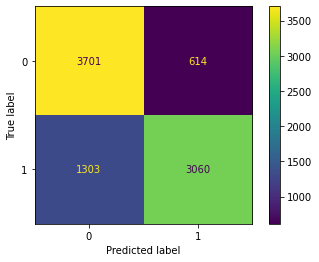

In [ ]:
sns.reset_orig() 
cm_knn = confusion_matrix(y_train, knn_preds, labels = knn_pipe.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix = cm_knn,
                                   display_labels = knn_pipe.classes_)

disp_knn.plot();

### **3. Regresión logística**

In [ ]:
#Instancia el modelo 
logreg = LogisticRegression(random_state = 42, max_iter = 1000, 
                            multi_class = "ovr")

# Create a modeling pipeline
logreg_pipe = make_pipeline(pca15, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=15)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, multi_class='ovr',
                                    random_state=42))])

In [ ]:
#Evalua el modelo
y_test = logreg_pipe.predict(X_test)
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.7487900437888915
Testing accuracy: 1.0


In [ ]:
#Guarda las predicicones
logreg_preds = logreg_pipe.predict(X_train)

report_logreg = classification_report(y_train, logreg_preds)
print(report_logreg)

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      4315
           1       0.79      0.69      0.73      4363

    accuracy                           0.75      8678
   macro avg       0.75      0.75      0.75      8678
weighted avg       0.75      0.75      0.75      8678



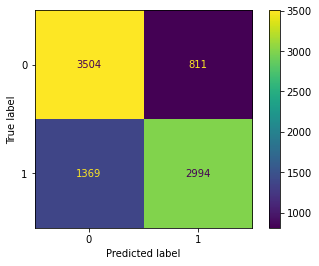

In [ ]:
sns.reset_orig() 
cm_logreg = confusion_matrix(y_train, logreg_preds, labels = logreg_pipe.classes_)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix = cm_logreg,
                                   display_labels = logreg_pipe.classes_)

disp_logreg.plot();

### **4. XGBoost**

In [ ]:
# Instantiate and fit gradient boosting classifier
xgb = XGBClassifier()

# Create a modeling pipeline
xgb_pipe = make_pipeline(pca15, xgb)

xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=15)),
                ('xgbclassifier', XGBClassifier())])

In [ ]:
#Evalúe el modelo
y_test = xgb_pipe.predict(X_test)
print('Training accuracy:', xgb_pipe.score(X_train, y_train))
print('Testing accuracy:', xgb_pipe.score(X_test, y_test))

Training accuracy: 0.7818621802258585
Testing accuracy: 1.0


In [ ]:
#Guarda las predicicones
xgb_preds = xgb_pipe.predict(X_train)

report_xgb = classification_report(y_train, xgb_preds)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.75      0.85      0.79      4315
           1       0.82      0.72      0.77      4363

    accuracy                           0.78      8678
   macro avg       0.79      0.78      0.78      8678
weighted avg       0.79      0.78      0.78      8678



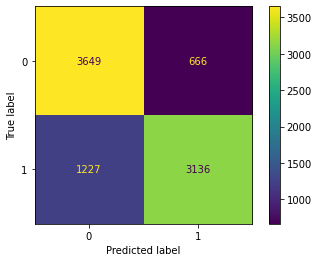

In [ ]:
sns.reset_orig() 
cm_xgb = confusion_matrix(y_train, xgb_preds, labels = xgb_pipe.classes_)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix = cm_xgb,
                                   display_labels = xgb_pipe.classes_)

disp_xgb.plot();

### **5. LightGBM**

In [ ]:
# Instantiate and fit gradient boosting classifier
lgbm = LGBMClassifier()

# Create a modeling pipeline
lgbm_pipe = make_pipeline(pca15, lgbm)

lgbm_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=15)),
                ('lgbmclassifier', LGBMClassifier())])

In [ ]:
#Evalúe el modelo
y_test = lgbm_pipe.predict(X_test)
print('Training accuracy:', lgbm_pipe.score(X_train, y_train))
print('Testing accuracy:', lgbm_pipe.score(X_test, y_test))

Training accuracy: 0.8391334408849965
Testing accuracy: 1.0


In [ ]:
#Guarda las predicicones
lgbm_preds = lgbm_pipe.predict(X_train)

report_lgbm = classification_report(y_train, lgbm_preds)
print(report_lgbm)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4315
           1       0.88      0.78      0.83      4363

    accuracy                           0.84      8678
   macro avg       0.84      0.84      0.84      8678
weighted avg       0.84      0.84      0.84      8678



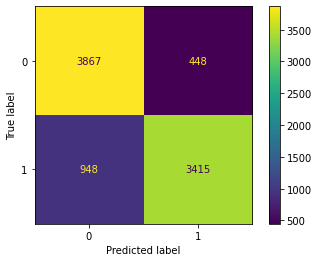

In [ ]:
sns.reset_orig() 
cm_lgbm = confusion_matrix(y_train, lgbm_preds, labels = lgbm_pipe.classes_)
disp_lgbm = ConfusionMatrixDisplay(confusion_matrix = cm_lgbm,
                                   display_labels = lgbm_pipe.classes_)

disp_lgbm.plot();

### **6. Gradient Boosting**

In [ ]:
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()

# Create a modeling pipeline
gbc_pipe = make_pipeline(pca15, gbc)

gbc_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=15)),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [ ]:
#Evalue el modelo
y_test = gbc_pipe.predict(X_test)
print('Training accuracy:', gbc_pipe.score(X_train, y_train))
print('Testing accuracy:', gbc_pipe.score(X_test, y_test))

Training accuracy: 0.7856648997464853
Testing accuracy: 1.0


In [ ]:
#Guarda las predicicones
gbc_preds = gbc_pipe.predict(X_train)

report_gbc = classification_report(y_train, gbc_preds)
print(report_gbc)

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      4315
           1       0.83      0.73      0.77      4363

    accuracy                           0.79      8678
   macro avg       0.79      0.79      0.79      8678
weighted avg       0.79      0.79      0.78      8678



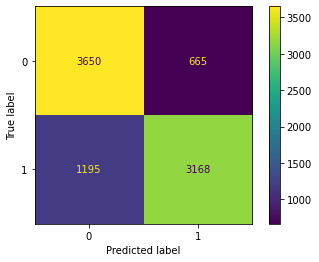

In [ ]:
sns.reset_orig() 
cm_gbc = confusion_matrix(y_train, gbc_preds, labels = gbc_pipe.classes_)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix = cm_gbc,
                                   display_labels = gbc_pipe.classes_)

disp_gbc.plot();

### **Modelo de Deep Learning**

In [ ]:
input_shape = X_train.shape[1]
input_shape

1844

In [ ]:
#Define el tipo de modelo
model = Sequential()

#Capas ocultas
# Primera
model.add(Dense(1844, 
                input_dim = input_shape, 
                activation = 'relu')) 

# Segunda
model.add(Dense(1024, 
                activation = 'relu')) 

# Tercera
model.add(Dense(512, 
                activation = 'relu')) 

# Cuarta
model.add(Dense(256, 
                activation = 'relu')) 

# Quinta
model.add(Dense(128, 
                activation = 'relu')) 

# Sexta
model.add(Dense(64, 
                activation = 'relu')) 

#Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'bce', optimizer = 'adam', metrics = ["accuracy"])

#early_stopping = EarlyStopping(patience = 5)

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100)#, callbacks = [early_stopping])


Epoch 1/100
272/272 [==============================] - 17s 55ms/step - loss: 0.5162 - accuracy: 0.7493 - val_loss: 0.4171 - val_accuracy: 0.8924
Epoch 2/100
272/272 [==============================] - 15s 55ms/step - loss: 0.4304 - accuracy: 0.7947 - val_loss: 0.3016 - val_accuracy: 0.9180
Epoch 3/100
272/272 [==============================] - 14s 52ms/step - loss: 0.3087 - accuracy: 0.8617 - val_loss: 0.4722 - val_accuracy: 0.7672
Epoch 4/100
272/272 [==============================] - 15s 54ms/step - loss: 0.1874 - accuracy: 0.9201 - val_loss: 0.4909 - val_accuracy: 0.7700
Epoch 5/100
272/272 [==============================] - 14s 53ms/step - loss: 0.1210 - accuracy: 0.9501 - val_loss: 0.5768 - val_accuracy: 0.7614
Epoch 6/100
272/272 [==============================] - 14s 52ms/step - loss: 0.0880 - accuracy: 0.9654 - val_loss: 0.7408 - val_accuracy: 0.7588
Epoch 7/100
272/272 [==============================] - 14s 52ms/step - loss: 0.0644 - accuracy: 0.9727 - val_loss: 1.0951 - val_ac